In [2]:
%config IPCompleter.greedy=True

In [41]:
import pandas as pd
import numpy as np
import pickle
from sklearn.linear_model import *
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import *
from catboost import CatBoostClassifier

In [4]:
df = pd.read_csv('dataset.csv', header=None)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.511836,0.637170,-0.000010,0.474134,0.626778,-0.035878,0.445819,0.573410,-0.050437,0.450609,...,0.532901,0.481656,-0.036599,0.529117,0.526541,-0.034820,0.531054,0.538925,-0.017970,0.0
1,0.512659,0.640747,0.000006,0.474861,0.628449,-0.031801,0.446108,0.575793,-0.044379,0.450378,...,0.532023,0.482252,-0.034177,0.528137,0.527010,-0.032714,0.530419,0.540917,-0.015090,0.0
2,0.512647,0.643877,0.000006,0.475224,0.631744,-0.032067,0.445610,0.578251,-0.045439,0.448308,...,0.532393,0.487056,-0.034582,0.528770,0.532068,-0.032108,0.531391,0.544561,-0.013796,0.0
3,0.513159,0.650373,0.000011,0.474759,0.637161,-0.037138,0.444326,0.582447,-0.054681,0.449234,...,0.532103,0.494320,-0.039853,0.528124,0.540335,-0.038336,0.530639,0.547571,-0.021270,0.0
4,0.511280,0.658031,0.000008,0.472758,0.641175,-0.034334,0.443270,0.589702,-0.051933,0.446981,...,0.529289,0.500241,-0.043820,0.525938,0.546513,-0.044242,0.528643,0.551523,-0.029630,0.0


In [17]:
X = df.iloc[:,:63]
Y = df.iloc[:, 63]

x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size=0.25, shuffle=True, random_state=42)

In [42]:
# model = LogisticRegression(max_iter=400, n_jobs=-1)
model = CatBoostClassifier(random_state=42)

In [35]:
scores = cross_val_score(model, X, Y, cv=10, scoring='accuracy', verbose=10, n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:   18.4s remaining:   42.9s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:   18.4s remaining:   18.4s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:   18.5s remaining:    7.9s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   28.6s finished


In [36]:
np.mean(scores), scores

(0.9975818181818182,
 array([1.        , 0.99745455, 0.99963636, 0.99727273, 0.99672727,
        0.998     , 0.99854545, 0.99781818, 0.99581818, 0.99454545]))

In [27]:
np.mean(scores), scores

(0.997090909090909,
 array([0.99881818, 0.99790909, 0.99727273, 0.99818182, 0.99327273]))

In [40]:
model.fit(X, Y)

LogisticRegression(max_iter=400, n_jobs=-1)

In [42]:
filename = 'lr_11.sav'
pickle.dump(model, open(f'../models/{filename}', 'wb'))

In [44]:
model.fit(x_train, y_train, verbose=False)
pred = model.predict(x_test)
accuracy_score(y_test, pred)

0.9966545454545455

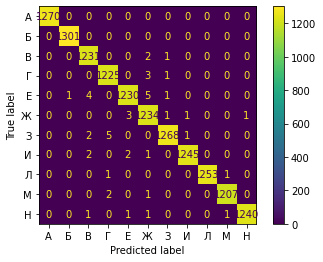

In [45]:
plot_confusion_matrix(model, x_test, y_test, display_labels=ALPH)